# Data Science 7 Days of Code
## Day 2
### Instruções
Eu te proponho: comece a investigar os seus dados e gerar visualizações para identificar padrões estranhos ou estatísticas interessantes.<br>Por exemplo: se você pegou o dataset do CEAPS, você consegue ver qual foi o senador que mais declarou despesas?<br>Você pode começar gerando algumas estatísticas bem simples, como contar valores de alguma coluna, somá-los, fazer agrupamentos, ordená-los etc. 

## Visualisando os dados
**Vou começar importando os dados não tratados pelo *Day1*, pois eles foram limpados e e algumas linhas de gastos foram removidas e para essa ocasião vou tratar do arquivo original: *despesa_ceaps_2022.xlsx*.**

In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as fig

dados = pd.read_excel('../../sevendaysofcode_datascience/despesa_ceaps_2022.xlsx')
dados

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,False,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,False,6000,2173614
1,2022,1,ACIR GURGACZ,False,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,False,1500,2173615
2,2022,1,ACIR GURGACZ,False,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,False,6000,2173616
3,2022,1,ACIR GURGACZ,False,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,False,1000,2173618
4,2022,1,ACIR GURGACZ,False,08.941.827/0001-01,False,000000000001772/A,17/01/2022,False,2000,2173617
...,...,...,...,...,...,...,...,...,...,...,...
16777,2022,12,ZEQUINHA MARINHO,False,22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,False,"2893,04",2191398
16778,2022,12,ZEQUINHA MARINHO,False,22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,False,"1180,19",2192272
16779,2022,12,ZEQUINHA MARINHO,False,22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,False,"2671,9",2192274
16780,2022,12,ZEQUINHA MARINHO,False,22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,False,"1334,31",2192244


## Criando coluna com valores numéricos
**A seguir vou fazer o mesmo código que fiz no *Day1* para resgatar os dados numéricos da coluna *VALOR_REEMBOLSADO*.**

In [683]:
lista = []
strings = []
floats = []

#Identificando e trocando ',' por '.'
for v in dados["VALOR_REEMBOLSADO"] :
    if type(v) == str :
        v = list(v)
        for l in range(len(v)) :
            if v[l] == "," :
                v[l] = "."
                lista.append(v)
                
#Concatenando as strings das listas
for x in lista :
    s = "".join(x)
    strings.append(s)

#Transformando em float
for n in strings :
    n = float(n)
    floats.append(n)

valores = []
novos_valores = []
valores_float = []
ifl = 0

#Identificando e trocando os valores de string pelos novos valores float
for valor in dados["VALOR_REEMBOLSADO"] :
    valores.append(valor)
for iv in range(len(valores)) :
    if type(valores[iv]) != str :
        novos_valores.append(valores[iv])
    else:
        valores[iv] = floats[ifl]
        novos_valores.append(valores[iv])
        ifl += 1
for q in novos_valores :
    q = float(q)
    valores_float.append(q)
valores_float = np.array(valores_float)

**Agoras temos os valores numéricos para poder fazer operações e *story telling*. Vou remover a coluna *VALOR_REEMBOLSADO* já que temos os valores numéricos, assim podendo criar uma nova coluna com os gastos: *VALOR*.**

In [684]:
dados = dados.drop(["VALOR_REEMBOLSADO", "TIPO_DESPESA"], axis=1)
dados["VALOR"] = valores_float
dados

,ANO,MES,SENADOR,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,COD_DOCUMENTO,VALOR
0,2022,1,ACIR GURGACZ,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,False,2173614,6000.00
1,2022,1,ACIR GURGACZ,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,False,2173615,1500.00
2,2022,1,ACIR GURGACZ,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,False,2173616,6000.00
3,2022,1,ACIR GURGACZ,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,False,2173618,1000.00
4,2022,1,ACIR GURGACZ,08.941.827/0001-01,False,000000000001772/A,17/01/2022,False,2173617,2000.00
...,...,...,...,...,...,...,...,...,...,...
16777,2022,12,ZEQUINHA MARINHO,22.052.777/0001-32,Exceller Tour,WIXHAI,06/12/2022,False,2191398,2893.04
16778,2022,12,ZEQUINHA MARINHO,22.052.777/0001-32,Exceller Tour,WITOLM,09/12/2022,False,2192272,1180.19
16779,2022,12,ZEQUINHA MARINHO,22.052.777/0001-32,Exceller Tour,THPKVQ,20/12/2022,False,2192274,2671.90
16780,2022,12,ZEQUINHA MARINHO,22.052.777/0001-32,Exceller Tour,QNN9HX,21/12/2022,False,2192244,1334.31


## Agrupando Dados dos Gastos
**Na célula abaixo irei agrupar os dados a partir dos senadores e calcular a soma de cada um.**

In [685]:
grupos_senadores = dados.groupby(["SENADOR"])[["VALOR"]].sum().round(2)
grupos_senadores = grupos_senadores.drop(index=False)
grupos_senadores = grupos_senadores.sort_values(by = 'VALOR')
grupos_senadores

,VALOR
SENADOR,
SAMUEL ARAUJO,7710.90
MARIA ELIZA DE AGUIAR E SILVA,10136.42
LEILA BARROS,10567.64
GUARACY SILVEIRA,19285.82
ANTONIO ANASTASIA,19647.13
...,...
RANDOLFE RODRIGUES,487758.92
MECIAS DE JESUS,488586.66
OMAR AZIZ,494369.33


In [686]:
print(f"Valor do maior gasto --> {max(grupos_senadores['VALOR'])}")
print(f"Valor do menor gasto --> {min(grupos_senadores['VALOR'])}")

Valor do maior gasto --> 511319.78
Valor do menor gasto --> 7710.9


## Plotando gráicos Gráficos
**A seguir irei plotar gráficos com a biblioteca *matplotlib* do *python* começando com gráfico de barras.**

<BarContainer object of 74 artists>

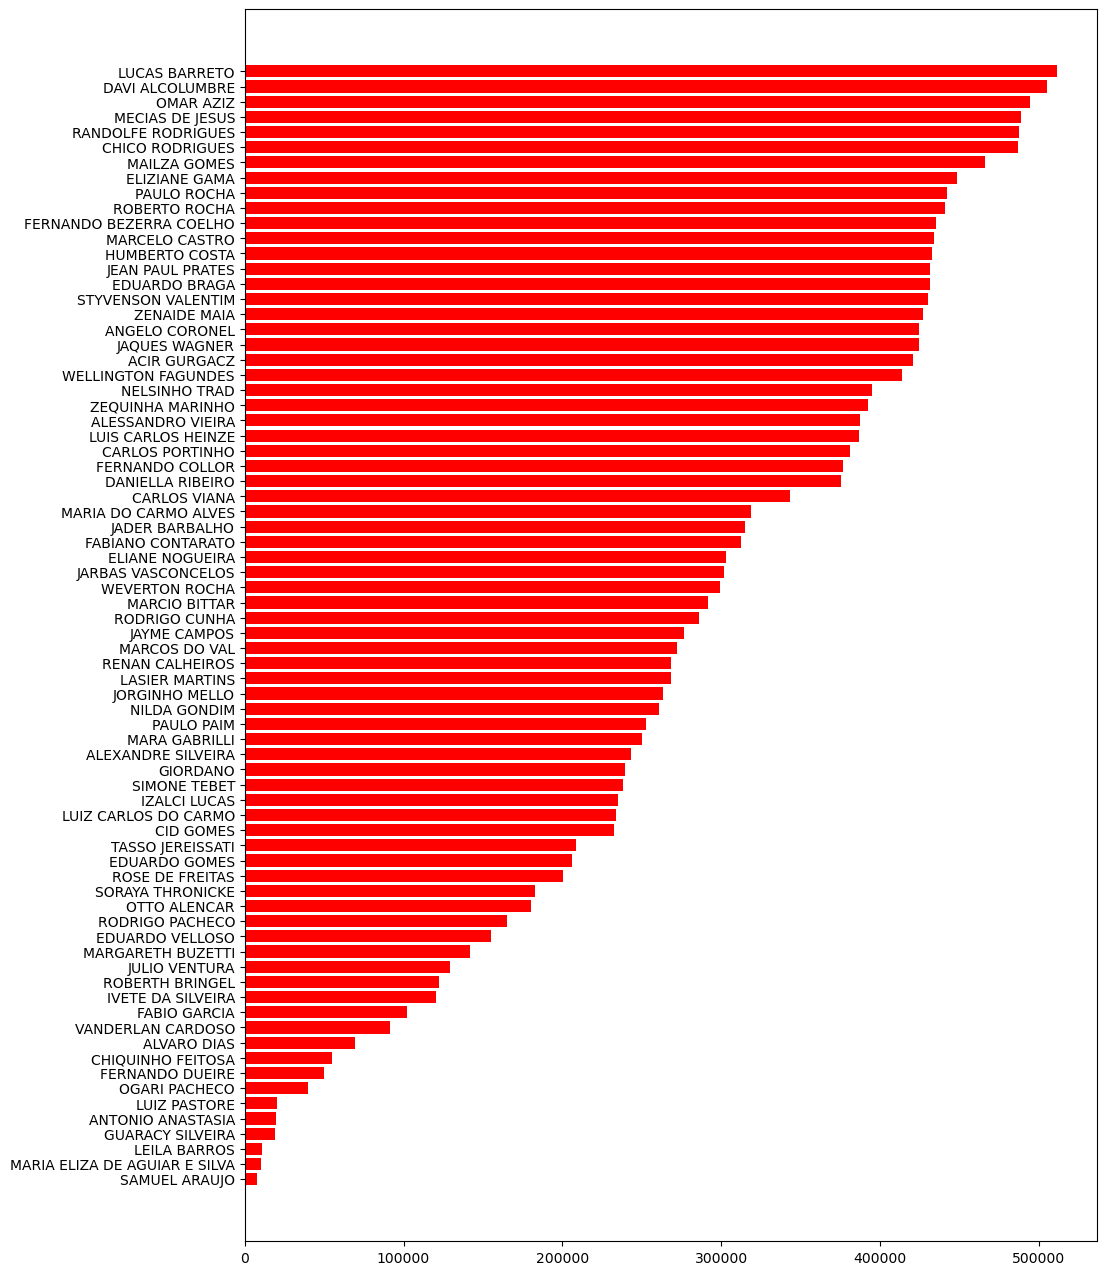

In [687]:
x = np.array(grupos_senadores.index)
y = np.array(grupos_senadores["VALOR"])
fig.figure(figsize=(11,16))
fig.barh(x,y,color='r')

**Como podemos ver o gráfico está muito grande, pois há muitos deputados, então seria interessante mostrar apenas os senadores que gastaram acima de 400k para o gráfico ficar legível.**

In [688]:
selecao_acima_400k = grupos_senadores["VALOR"] > 400000
selecao_acima_400k

SENADOR
SAMUEL ARAUJO                    False
MARIA ELIZA DE AGUIAR E SILVA    False
LEILA BARROS                     False
GUARACY SILVEIRA                 False
ANTONIO ANASTASIA                False
                                 ...  
RANDOLFE RODRIGUES                True
MECIAS DE JESUS                   True
OMAR AZIZ                         True
DAVI ALCOLUMBRE                   True
LUCAS BARRETO                     True
Name: VALOR, Length: 74, dtype: bool

In [689]:
senadores_acima_400k = grupos_senadores[selecao_acima_400k]
senadores_acima_400k = senadores_acima_400k.sort_values(by="VALOR")
senadores_acima_400k

,VALOR
SENADOR,
WELLINGTON FAGUNDES,413781.99
ACIR GURGACZ,420690.40
JAQUES WAGNER,424537.19
ANGELO CORONEL,424579.23
ZENAIDE MAIA,427092.42
STYVENSON VALENTIM,430522.76
EDUARDO BRAGA,431498.33
JEAN PAUL PRATES,431714.40
HUMBERTO COSTA,432562.24


<BarContainer object of 21 artists>

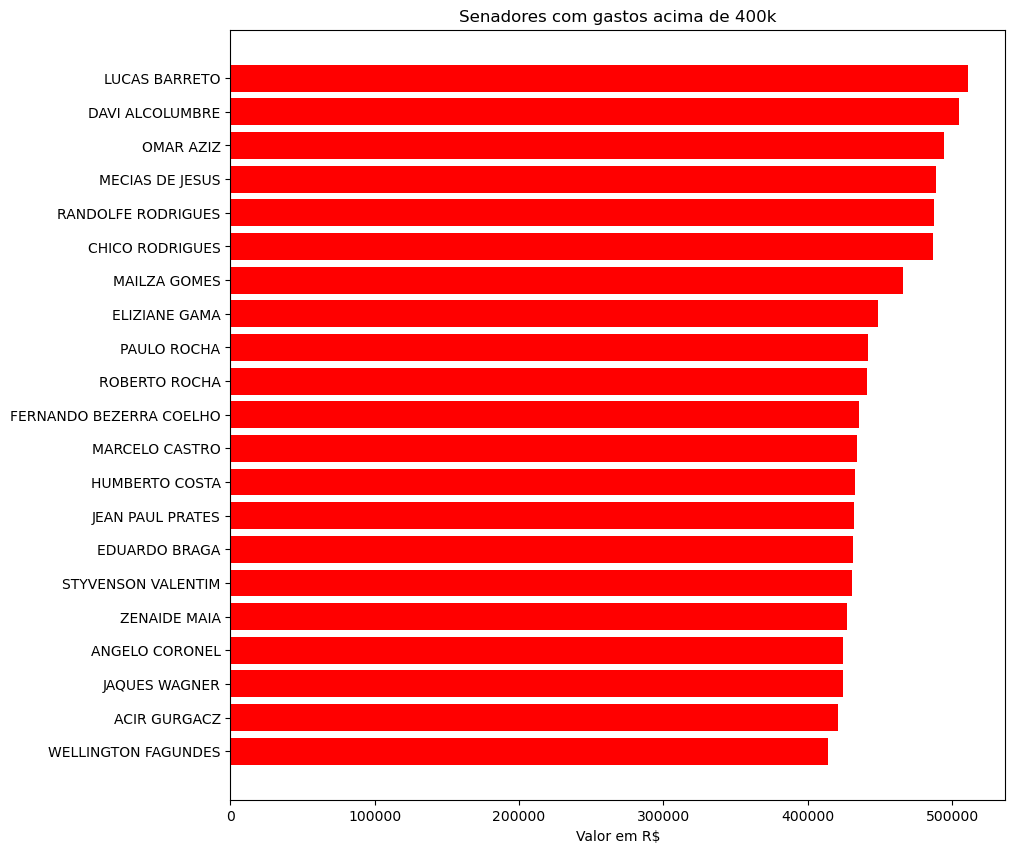

In [690]:
x = np.array(senadores_acima_400k.index)
y = np.array(senadores_acima_400k["VALOR"])
fig.figure(figsize=(10,10))
fig.title("Senadores com gastos acima de 400k")
fig.xlabel("Valor em R$")
fig.barh(x,y,color='r', )

**Agora temos um gráfico mais legível, mostrando os senadores que gastaram mais de 400k.**

**A célula abaixo mostra um código para gerar um gráfico do senador *Lucas barreto*, mas pode ser gerado para qualque um senador onde o número de linhas do *Data Frame* são um *array* para o eixo x. O eixo y são os gastos, gerando assim um gráfico de gastos no geral.**

Text(0, 0.5, 'Valor gasto')

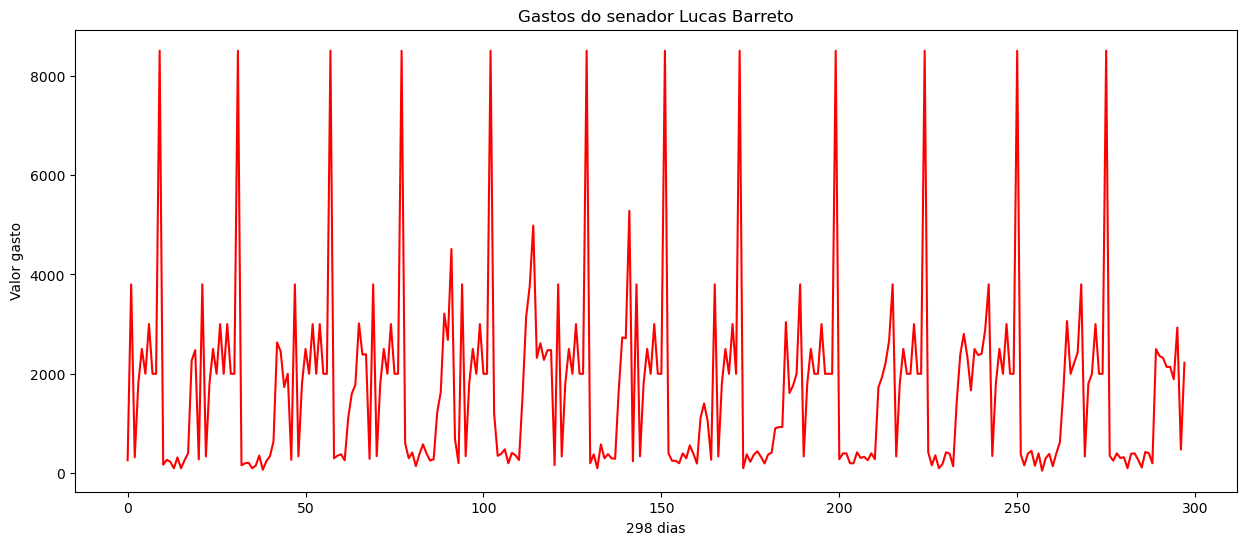

In [691]:
selecao_lucas = dados["SENADOR"] == "LUCAS BARRETO"
df_lucas = dados[selecao_lucas]

x = np.arange(len(df_lucas))
y = np.array(df_lucas["VALOR"])

fig.figure(figsize=(15,6))
fig.plot(x, y,'-r')
fig.title("Gastos do senador Lucas Barreto")
fig.xlabel("298 dias")
fig.ylabel("Valor gasto")


**Gerando o gráfico de gastos**

**Esse gráfico de 298 dias de gasto é interessante, pois é possível notar uma constância nos gastos deste senador**

## Dia 2 finalizado
Filtrei e agrupei valores, criei um nova coluna e representei graficamente os gastos dos senadores.